In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.dropna(how='all', inplace=True)
df['Area Privada'] = df['Area Privada'].str.extract('(\d+\.?\d*)').astype(float)
df['Area'] = df['Area'].str.extract('(\d+\.?\d*)').astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_35317/2323442900.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Area Privada'] = df['Area Privada'].str.extract('(\d+\.?\d*)').astype(float)
/tmp/ipykernel_35317/2323442900.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['Area'] = df['Area'].str.extract('(\d+\.?\d*)').astype(float)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594 entries, 0 to 684
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       594 non-null    float64
 1   Tipo de inmueble         594 non-null    object 
 2   Precio (admin_included)  594 non-null    float64
 3   Estrato                  591 non-null    float64
 4   Baños                    579 non-null    float64
 5   Habitaciones             550 non-null    float64
 6   Parqueaderos             252 non-null    float64
 7   Area                     594 non-null    float64
 8   Area Privada             481 non-null    float64
 9   Piso                     594 non-null    float64
 10  Facilities               458 non-null    object 
 11  Descripción              594 non-null    object 
 12  Antiguedad               535 non-null    object 
 13  Estado                   53 non-null     object 
dtypes: float64(9), object(5)
memory

In [5]:
df.to_csv('cleaned_dataset.csv', index=False)

In [6]:
df.head(10)

,ID,Tipo de inmueble,Precio (admin_included),Estrato,Baños,Habitaciones,Parqueaderos,Area,Area Privada,Piso,Facilities,Descripción,Antiguedad,Estado
0,10830219.0,Apartaestudio,1800000.0,4.0,1.0,NaN,NaN,22.0,22.0,2.0,"Amoblado, Cocina Integral, Colegios / Universi...","Aparta Estudio en excelente ubicación, con tod...",9 a 15 años,NaN
1,191712314.0,Apartaestudio,3500000.0,4.0,1.0,1.0,NaN,31.0,31.0,0.0,"Alcantarillado, Amoblado, Ascensor, Bahias de ...",Este elegante apartaestudio ofrece una combina...,menor a 1 año,NaN
2,10183666.0,Apartamento,1050000.0,4.0,1.0,1.0,NaN,45.0,45.0,2.0,"Barra estilo americano, Cocina Integral, Cocin...","Apartamentos de 1 alcoba, sala comedor, cocina...",1 a 8 años,NaN
3,10949219.0,Apartamento,3500000.0,4.0,2.0,2.0,1.0,68.2,68.2,14.0,"Ascensor, Balcón, Barra estilo americano, Baño...",Excelente apartamento en el proyecto Avanzza P...,menor a 1 año,NaN
4,192059073.0,Apartamento,1281000.0,4.0,1.0,1.0,1.0,17.0,17.0,0.0,"Acceso Pavimentado, Alcantarillado, Cochera, C...",[ARR] ID HOUM: 148368 Entérate de todos los b...,menor a 1 año,Excelente estado
6,191752583.0,Apartaestudio,1450000.0,3.0,1.0,1.0,NaN,26.0,26.0,0.0,"Balcón, Terraza","HERMOSO Y COMODO APARTAESTUDIO , ILUMINACION N...",1 a 8 años,NaN
8,191237365.0,Casa,6000000.0,5.0,5.0,5.0,5.0,380.0,380.0,1.0,"Bahias de parqueo, Bahía exterior de parqueo",Oportunidad Única! Casa Espectacular en Renta ...,16 a 30 años,Buen estado
9,191287641.0,Apartaestudio,2300000.0,4.0,1.0,1.0,NaN,19.0,NaN,4.0,"Amoblado, Ascensor, Colegios / Universidades, ...",Hermoso apartaestudio Nuevo y Amoblado cerca d...,menor a 1 año,NaN
10,191382794.0,Casa,15000000.0,4.0,6.0,19.0,4.0,608.0,608.0,3.0,"Acceso Pavimentado, Baño Auxiliar, Cerca de Zo...",Este inmueble cuenta con los espacios y la ubi...,más de 30 años,NaN
11,191214224.0,Habitación,550000.0,4.0,NaN,NaN,NaN,70.0,NaN,0.0,NaN,Se arrienda habitación pequeña con closet y es...,NaN,NaN


In [7]:
# Check for duplicate IDs
duplicate_ids = df['ID'].duplicated().sum()
print(f"Number of duplicate IDs found: {duplicate_ids}")

# Remove duplicate rows keeping the first occurrence
df = df.drop_duplicates(subset=['ID'], keep='first')
print(f"Dataframe shape after removing duplicates: {df.shape}")

Number of duplicate IDs found: 0
Dataframe shape after removing duplicates: (594, 14)


In [8]:
model_df = df.drop(columns=['Descripción', 'Facilities', 'ID', 'Estado'])

In [9]:
model_df.head()

,Tipo de inmueble,Precio (admin_included),Estrato,Baños,Habitaciones,Parqueaderos,Area,Area Privada,Piso,Antiguedad
0,Apartaestudio,1800000.0,4.0,1.0,NaN,NaN,22.0,22.0,2.0,9 a 15 años
1,Apartaestudio,3500000.0,4.0,1.0,1.0,NaN,31.0,31.0,0.0,menor a 1 año
2,Apartamento,1050000.0,4.0,1.0,1.0,NaN,45.0,45.0,2.0,1 a 8 años
3,Apartamento,3500000.0,4.0,2.0,2.0,1.0,68.2,68.2,14.0,menor a 1 año
4,Apartamento,1281000.0,4.0,1.0,1.0,1.0,17.0,17.0,0.0,menor a 1 año


In [10]:
model_df['Tipo de inmueble'].value_counts()

Tipo de inmueble
Apartamento      253
Apartaestudio    143
Casa             103
Habitación        95
Name: count, dtype: int64

In [11]:
model_df['Antiguedad'].value_counts()

Antiguedad
más de 30 años    137
1 a 8 años        130
16 a 30 años      122
9 a 15 años        77
menor a 1 año      69
Name: count, dtype: int64

In [12]:
model_df['Tipo de inmueble'] = model_df['Tipo de inmueble'].replace({
	'Apartaestudio': 'Apartamento',
	'Habitación': 'Apartamento'
})

In [13]:
null_counts = model_df.isnull().sum()
print(null_counts)

Tipo de inmueble             0
Precio (admin_included)      0
Estrato                      3
Baños                       15
Habitaciones                44
Parqueaderos               342
Area                         0
Area Privada               113
Piso                         0
Antiguedad                  59
dtype: int64


In [14]:
model_df['Parqueaderos'] = model_df['Parqueaderos'].fillna(0)
model_df['Baños'] = model_df['Baños'].fillna(0)
model_df['Estrato'] = model_df['Estrato'].fillna(model_df['Estrato'].mode()[0])
model_df['Antiguedad'] = model_df['Antiguedad'].fillna(model_df['Antiguedad'].mode()[0])
model_df['Habitaciones'] = model_df['Habitaciones'].fillna(1)
model_df['Area Privada'] = model_df['Area Privada'].fillna(model_df['Area'].iloc[0])

In [15]:
# Add price per square meter as a feature
model_df['Precio_por_m2'] = model_df['Precio (admin_included)'] / model_df['Area']

# Add bedroom-to-bathroom ratio
model_df['Bedroom_Bath_Ratio'] = model_df['Habitaciones'] / model_df['Baños'].replace(0, 0.5)

# Add categorical features for property size
model_df['Size_Category'] = pd.cut(
    model_df['Area'], 
    bins=[0, 30, 60, 120, 500, float('inf')],
    labels=['Tiny', 'Small', 'Medium', 'Large', 'Huge']
)
model_df = pd.get_dummies(model_df, columns=['Size_Category'], drop_first=True)

In [16]:
model_df_original = model_df.copy()
model_df

,Tipo de inmueble,Precio (admin_included),Estrato,Baños,Habitaciones,Parqueaderos,Area,Area Privada,Piso,Antiguedad,Precio_por_m2,Bedroom_Bath_Ratio,Size_Category_Small,Size_Category_Medium,Size_Category_Large,Size_Category_Huge
0,Apartamento,1800000.0,4.0,1.0,1.0,0.0,22.0,22.0,2.0,9 a 15 años,81818.181818,1.0,False,False,False,False
1,Apartamento,3500000.0,4.0,1.0,1.0,0.0,31.0,31.0,0.0,menor a 1 año,112903.225806,1.0,True,False,False,False
2,Apartamento,1050000.0,4.0,1.0,1.0,0.0,45.0,45.0,2.0,1 a 8 años,23333.333333,1.0,True,False,False,False
3,Apartamento,3500000.0,4.0,2.0,2.0,1.0,68.2,68.2,14.0,menor a 1 año,51319.648094,1.0,False,True,False,False
4,Apartamento,1281000.0,4.0,1.0,1.0,1.0,17.0,17.0,0.0,menor a 1 año,75352.941176,1.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,Apartamento,3500000.0,4.0,1.0,2.0,0.0,90.0,90.0,0.0,1 a 8 años,38888.888889,2.0,False,True,False,False
681,Apartamento,1600000.0,5.0,1.0,1.0,0.0,18.0,16.0,2.0,1 a 8 años,88888.888889,1.0,False,False,False,False
682,Apartamento,4000000.0,4.0,2.0,4.0,1.0,168.0,22.0,4.0,más de 30 años,23809.523810,2.0,False,False,True,False
683,Casa,7000000.0,4.0,0.0,1.0,0.0,600.0,600.0,0.0,más de 30 años,11666.666667,2.0,False,False,False,True


In [17]:
model_df = pd.get_dummies(model_df, columns=['Tipo de inmueble'], drop_first=True)
model_df = pd.get_dummies(model_df, columns=['Antiguedad'], drop_first=True)


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['Precio (admin_included)', 'Area Privada', 'Area', 'Estrato', 'Baños', 'Habitaciones', 'Piso']  # incluye todas las variables numéricas
model_df[features] = scaler.fit_transform(model_df[features])


For n_clusters = 2, the silhouette score is 0.5350571570008068
For n_clusters = 3, the silhouette score is 0.5269820745184624
For n_clusters = 4, the silhouette score is 0.34717431807636123
For n_clusters = 5, the silhouette score is 0.3545222439692743
For n_clusters = 6, the silhouette score is 0.3602321823810078
For n_clusters = 7, the silhouette score is 0.36662295544876755
For n_clusters = 8, the silhouette score is 0.3836718232550033
For n_clusters = 9, the silhouette score is 0.38450713069750936


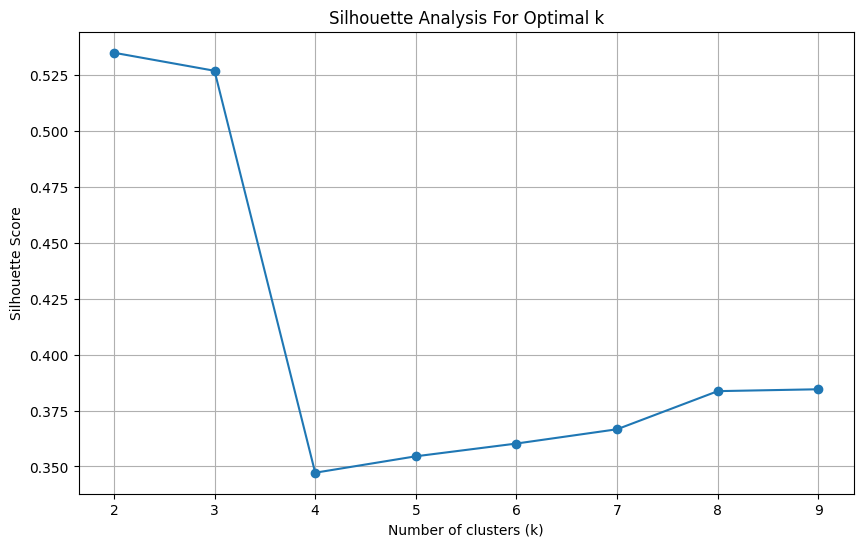

Optimal number of clusters: 2


In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# from sklearn.metrics import silhouette_score

# # Determinación del número óptimo de clusters con el método del codo
# wcss = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(model_df[features])
#     wcss.append(kmeans.inertia_)

# plt.plot(range(2, 10), wcss, marker='o')
# plt.xlabel('Número de clusters')
# plt.ylabel('WCSS')
# plt.title('Método del Codo')
# plt.show()

# # Selección de k basado en el método del codo y cálculo de la silueta

# k_opt = 2  # por ejemplo, si el codo es en 3
# kmeans = KMeans(n_clusters=k_opt, random_state=42)
# clusters = kmeans.fit_predict(model_df[features])
# score = silhouette_score(model_df[features], clusters)
# print("Silhouette Score:", score)   


# model_df['Cluster'] = clusters

from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Compute silhouette scores for different k values
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(model_df[features])
    silhouette_avg = silhouette_score(model_df[features], clusters)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.grid(True)
plt.show()

# Choose optimal k (highest silhouette score)
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")


In [20]:
# Imprimir el DataFrame completo en la consola
model_df_original['Cluster'] = clusters
model_df_original
# Si prefieres guardar el DataFrame con los clusters en un CSV:
# model_df.to_csv("df_with_clusters.csv", index=False)


,Tipo de inmueble,Precio (admin_included),Estrato,Baños,Habitaciones,Parqueaderos,Area,Area Privada,Piso,Antiguedad,Precio_por_m2,Bedroom_Bath_Ratio,Size_Category_Small,Size_Category_Medium,Size_Category_Large,Size_Category_Huge,Cluster
0,Apartamento,1800000.0,4.0,1.0,1.0,0.0,22.0,22.0,2.0,9 a 15 años,81818.181818,1.0,False,False,False,False,0
1,Apartamento,3500000.0,4.0,1.0,1.0,0.0,31.0,31.0,0.0,menor a 1 año,112903.225806,1.0,True,False,False,False,0
2,Apartamento,1050000.0,4.0,1.0,1.0,0.0,45.0,45.0,2.0,1 a 8 años,23333.333333,1.0,True,False,False,False,0
3,Apartamento,3500000.0,4.0,2.0,2.0,1.0,68.2,68.2,14.0,menor a 1 año,51319.648094,1.0,False,True,False,False,2
4,Apartamento,1281000.0,4.0,1.0,1.0,1.0,17.0,17.0,0.0,menor a 1 año,75352.941176,1.0,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,Apartamento,3500000.0,4.0,1.0,2.0,0.0,90.0,90.0,0.0,1 a 8 años,38888.888889,2.0,False,True,False,False,0
681,Apartamento,1600000.0,5.0,1.0,1.0,0.0,18.0,16.0,2.0,1 a 8 años,88888.888889,1.0,False,False,False,False,8
682,Apartamento,4000000.0,4.0,2.0,4.0,1.0,168.0,22.0,4.0,más de 30 años,23809.523810,2.0,False,False,True,False,5
683,Casa,7000000.0,4.0,0.0,1.0,0.0,600.0,600.0,0.0,más de 30 años,11666.666667,2.0,False,False,False,True,6


GMM Silhouette Score: 0.1049937464367089
DBSCAN produced noise points or a single cluster. Adjust parameters.
Hierarchical Clustering Silhouette Score: 0.5152151913113655


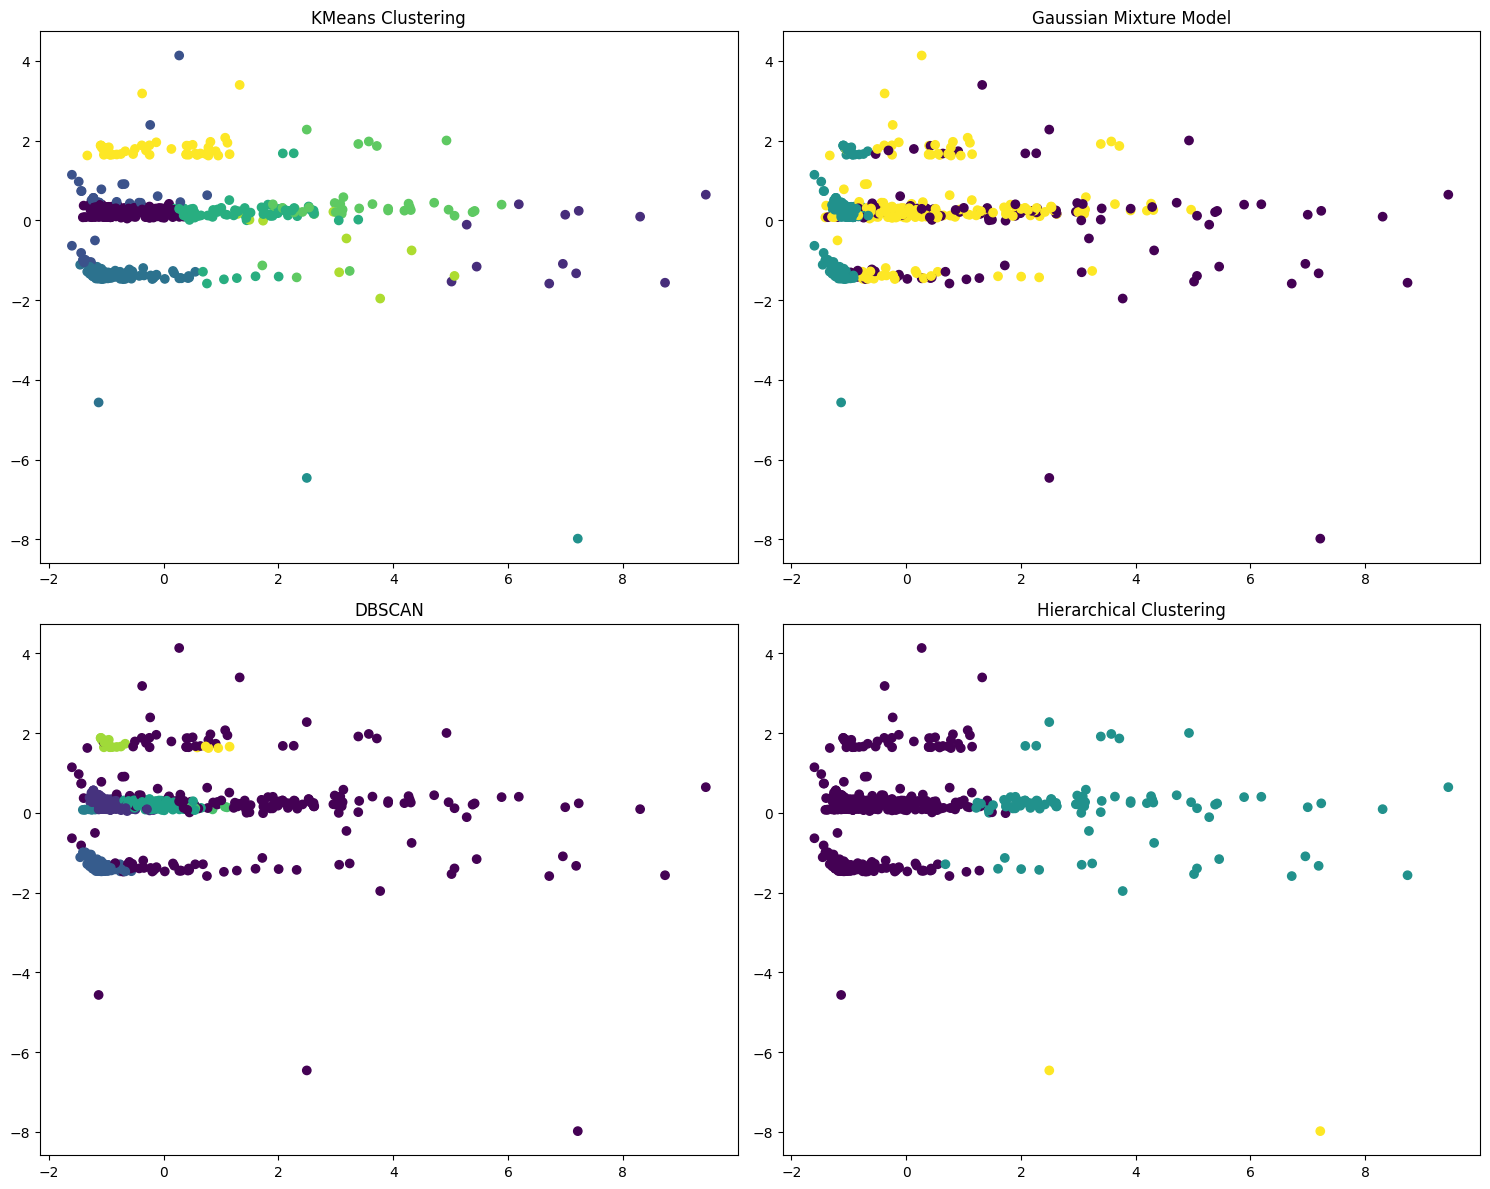

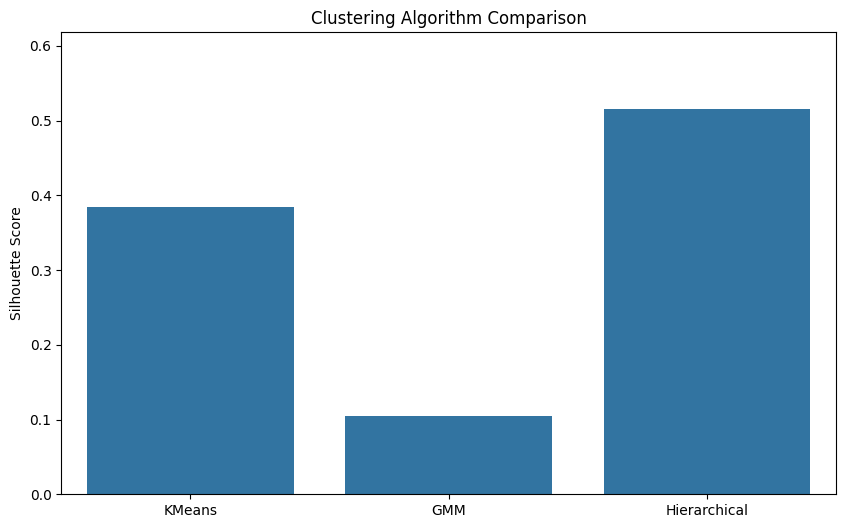

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Assuming model_df and features are already defined

# 1. Gaussian Mixture Models
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_clusters = gmm.fit_predict(model_df[features])
gmm_score = silhouette_score(model_df[features], gmm_clusters)
print(f"GMM Silhouette Score: {gmm_score}")

# 2. DBSCAN - density-based clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(model_df[features])
# Only calculate silhouette score if there's more than one cluster and no noise points (-1)
if len(set(dbscan_clusters)) > 1 and -1 not in dbscan_clusters:
    dbscan_score = silhouette_score(model_df[features], dbscan_clusters)
    print(f"DBSCAN Silhouette Score: {dbscan_score}")
else:
    print("DBSCAN produced noise points or a single cluster. Adjust parameters.")

# 3. Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3)
hc_clusters = hc.fit_predict(model_df[features])
hc_score = silhouette_score(model_df[features], hc_clusters)
print(f"Hierarchical Clustering Silhouette Score: {hc_score}")

# Visualization of different clustering results using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(model_df[features])

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# KMeans plot
axes[0, 0].scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
axes[0, 0].set_title('KMeans Clustering')

# GMM plot
axes[0, 1].scatter(principal_components[:, 0], principal_components[:, 1], c=gmm_clusters, cmap='viridis')
axes[0, 1].set_title('Gaussian Mixture Model')

# DBSCAN plot
axes[1, 0].scatter(principal_components[:, 0], principal_components[:, 1], c=dbscan_clusters, cmap='viridis')
axes[1, 0].set_title('DBSCAN')

# Hierarchical clustering plot
axes[1, 1].scatter(principal_components[:, 0], principal_components[:, 1], c=hc_clusters, cmap='viridis')
axes[1, 1].set_title('Hierarchical Clustering')

plt.tight_layout()
plt.show()

# Compare the performance of different algorithms
algorithms = ['KMeans', 'GMM', 'Hierarchical']
scores = [silhouette_score(model_df[features], clusters), 
          gmm_score, 
          hc_score]

plt.figure(figsize=(10, 6))
sns.barplot(x=algorithms, y=scores)
plt.ylabel('Silhouette Score')
plt.title('Clustering Algorithm Comparison')
plt.ylim(0, max(scores) * 1.2)
plt.show()

Number of properties in each cluster:
Cluster
0    274
1     12
2     34
3    106
4      2
5     71
6     38
7      9
8     48
Name: count, dtype: int64

Cluster Profiles:
        Precio (admin_included)                                         \
                           mean       median          min          max   
Cluster                                                                  
0                  1.814757e+06    1650000.0     300000.0    6500000.0   
1                  1.239167e+07   13500000.0    5500000.0   20000000.0   
2                  2.240324e+06    2000000.0     977000.0    5500000.0   
3                  1.597577e+06    1470000.0     460000.0    7500000.0   
4                  6.175000e+08  617500000.0  465000000.0  770000000.0   
5                  5.337694e+06    4800000.0     480000.0   18500000.0   
6                  8.356184e+06    6500000.0     500000.0   25000000.0   
7                  1.285333e+07    5500000.0      50000.0   60000000.0   
8             

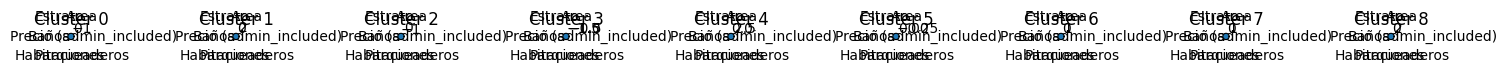

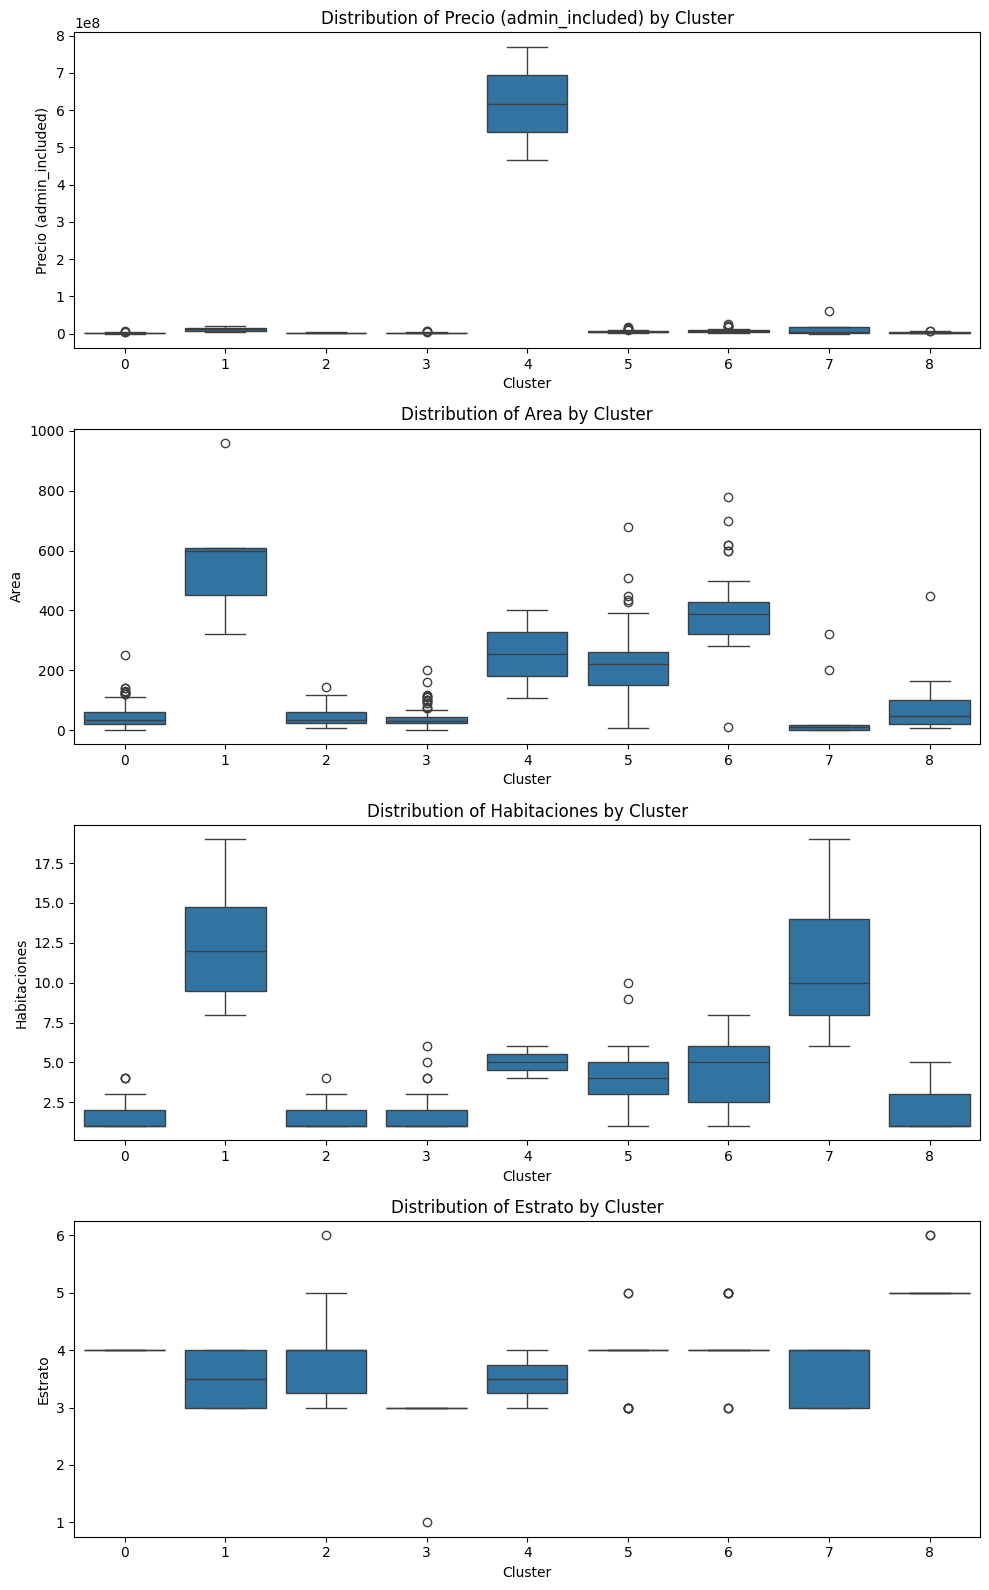

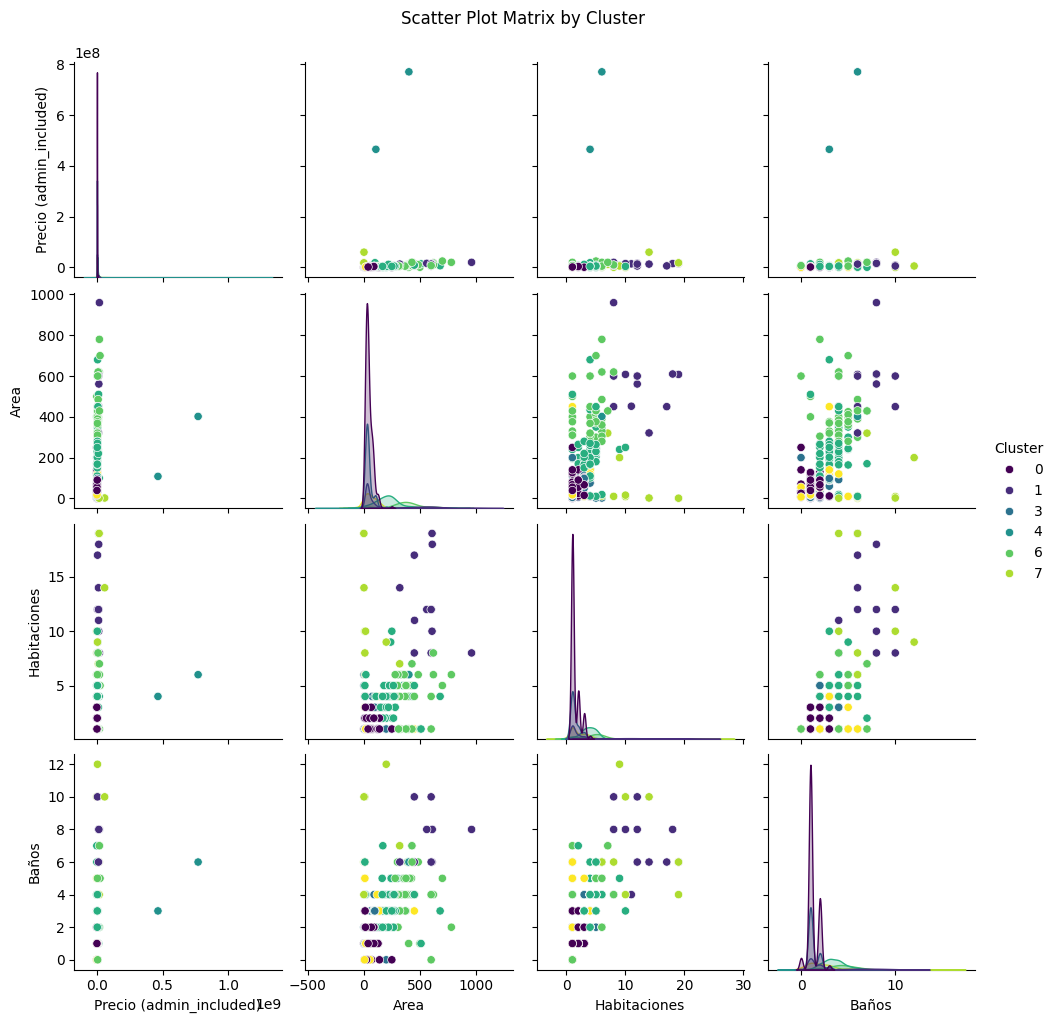


Statistical Tests for Cluster Differences:
                          test    statistic p_value
Precio (admin_included)  ANOVA  1062.379206     0.0
Area                     ANOVA   230.053209     0.0
Habitaciones             ANOVA   193.548594     0.0
Estrato                  ANOVA   289.443731     0.0

Cluster Market Segments:
Cluster 0: Budget Compact Properties
Cluster 1: Budget Spacious Properties
Cluster 2: Budget Compact Properties
Cluster 3: Budget Compact Properties
Cluster 4: Premium Spacious Properties
Cluster 5: Budget Spacious Properties
Cluster 6: Budget Spacious Properties
Cluster 7: Budget Compact Properties
Cluster 8: Budget Compact Properties

Sample of segmented properties:
   Tipo de inmueble  Precio (admin_included)   Area  Habitaciones  Cluster  \
0       Apartamento                1800000.0   22.0           1.0        0   
1       Apartamento                3500000.0   31.0           1.0        0   
2       Apartamento                1050000.0   45.0           1.0

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming model_df_original now has the 'Cluster' column

# Add the clusters back to the original dataframe for analysis
# model_df_original['Cluster'] = best_model_clusters  # (use the clusters from your best model)

# 1. Detailed cluster profiling
def analyze_clusters(df, cluster_column='Cluster'):
    """Analyze the characteristics of each cluster"""
    
    # Number of properties in each cluster
    cluster_counts = df[cluster_column].value_counts().sort_index()
    print(f"Number of properties in each cluster:\n{cluster_counts}")
    
    # Create a profile for each numeric column
    numeric_cols = ['Precio (admin_included)', 'Area', 'Area Privada', 
                    'Estrato', 'Baños', 'Habitaciones', 'Parqueaderos', 'Piso']
    
    profile = df.groupby(cluster_column)[numeric_cols].agg(['mean', 'median', 'min', 'max', 'std'])
    print("\nCluster Profiles:")
    print(profile)
    
    # Distribution of categorical variables across clusters
    categorical_cols = ['Tipo de inmueble', 'Antiguedad']
    for col in categorical_cols:
        if col in df.columns:
            print(f"\nDistribution of {col} across clusters:")
            print(pd.crosstab(df[cluster_column], df[col], normalize='index'))
    
    return profile

profile = analyze_clusters(model_df_original)

# 2. Visualize the cluster profiles
def plot_cluster_profiles(df, numeric_cols, cluster_col='Cluster'):
    """Plot radar charts to visualize cluster profiles"""
    
    # Get the number of clusters
    n_clusters = df[cluster_col].nunique()
    
    # Calculate the mean of each feature for each cluster
    means = df.groupby(cluster_col)[numeric_cols].mean()
    
    # Scale the data between 0 and 1 for radar chart
    scaler = StandardScaler()
    means_scaled = pd.DataFrame(
        scaler.fit_transform(means),
        index=means.index,
        columns=means.columns
    )
    
    # Create a radar chart for each cluster
    fig, axes = plt.subplots(1, n_clusters, figsize=(15, 5), subplot_kw=dict(polar=True))
    if n_clusters == 1:
        axes = [axes]
    
    for i, ax in enumerate(axes):
        values = means_scaled.iloc[i].values
        angles = np.linspace(0, 2*np.pi, len(numeric_cols), endpoint=False).tolist()
        values = np.concatenate((values, [values[0]]))  # Close the loop
        angles = np.concatenate((angles, [angles[0]]))  # Close the loop
        
        ax.plot(angles, values, 'o-', linewidth=2)
        ax.fill(angles, values, alpha=0.25)
        ax.set_thetagrids(np.degrees(angles[:-1]), numeric_cols)
        ax.set_title(f'Cluster {i}')
    
    plt.tight_layout()
    plt.show()

# Plot radar charts for key numeric features
plot_features = ['Precio (admin_included)', 'Area', 'Estrato', 'Baños', 'Habitaciones', 'Parqueaderos']
plot_cluster_profiles(model_df_original, plot_features)

# 3. Box plots for key variables by cluster
def plot_boxplots(df, features, cluster_col='Cluster'):
    """Create boxplots for each feature by cluster"""
    
    n_features = len(features)
    fig, axes = plt.subplots(n_features, 1, figsize=(10, 4*n_features))
    
    if n_features == 1:
        axes = [axes]
    
    for i, feature in enumerate(features):
        sns.boxplot(x=cluster_col, y=feature, data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature} by Cluster')
    
    plt.tight_layout()
    plt.show()

# Create boxplots for key features
key_features = ['Precio (admin_included)', 'Area', 'Habitaciones', 'Estrato']
plot_boxplots(model_df_original, key_features)

# 4. Scatter plot matrix for visual cluster inspection
sns.pairplot(model_df_original, 
             vars=['Precio (admin_included)', 'Area', 'Habitaciones', 'Baños'], 
             hue='Cluster', 
             palette='viridis')
plt.suptitle('Scatter Plot Matrix by Cluster', y=1.02)
plt.show()

# 5. Statistical tests to confirm cluster differences
def test_cluster_differences(df, features, cluster_col='Cluster'):
    """Run statistical tests to confirm differences between clusters"""
    
    results = {}
    n_clusters = df[cluster_col].nunique()
    
    for feature in features:
        # For features with 2 clusters, use t-test
        if n_clusters == 2:
            cluster_0 = df[df[cluster_col] == 0][feature]
            cluster_1 = df[df[cluster_col] == 1][feature]
            t_stat, p_val = stats.ttest_ind(cluster_0, cluster_1, equal_var=False)
            results[feature] = {'test': 't-test', 'statistic': t_stat, 'p_value': p_val}
        # For more than 2 clusters, use ANOVA
        else:
            groups = [df[df[cluster_col] == i][feature] for i in range(n_clusters)]
            f_stat, p_val = stats.f_oneway(*groups)
            results[feature] = {'test': 'ANOVA', 'statistic': f_stat, 'p_value': p_val}
    
    return pd.DataFrame(results).T

# Run statistical tests
stat_results = test_cluster_differences(model_df_original, key_features)
print("\nStatistical Tests for Cluster Differences:")
print(stat_results)

# 6. Market segment labeling based on cluster characteristics
def label_clusters(profile):
    """Assign business-friendly labels to clusters based on their characteristics"""
    
    cluster_labels = {}
    
    # Calculate average price and area across all clusters to use as thresholds
    avg_price = profile[('Precio (admin_included)', 'mean')].mean()
    avg_area = profile[('Area', 'mean')].mean()
    
    for cluster in profile.index:
        # Extract key metrics for this cluster
        price = profile.loc[cluster, ('Precio (admin_included)', 'mean')]
        area = profile.loc[cluster, ('Area', 'mean')]
        rooms = profile.loc[cluster, ('Habitaciones', 'mean')]
        
        # Logic to assign labels based on property characteristics
        if price > avg_price:
            price_label = "Premium"
        else:
            price_label = "Budget"
            
        if area > avg_area:
            size_label = "Spacious"
        else:
            size_label = "Compact"
            
        cluster_labels[cluster] = f"{price_label} {size_label} Properties"
    
    return cluster_labels

# Generate business-friendly cluster labels
cluster_labels = label_clusters(profile)
print("\nCluster Market Segments:")
for cluster, label in cluster_labels.items():
    print(f"Cluster {cluster}: {label}")

# Add the labels to the original dataframe
model_df_original['Market_Segment'] = model_df_original['Cluster'].map(cluster_labels)

# Display sample of final dataset with clusters and labels
print("\nSample of segmented properties:")
print(model_df_original[['Tipo de inmueble', 'Precio (admin_included)', 'Area', 
                         'Habitaciones', 'Cluster', 'Market_Segment']].head(10))

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import make_scorer, silhouette_score

# Define parameter grid
param_grid = {
    'n_clusters': range(2, 10),
    'init': ['k-means++', 'random'],
    'n_init': [10, 15, 20],
    'max_iter': [300, 500]
}

# Create a custom scorer
silhouette_scorer = make_scorer(silhouette_score, greater_is_better=True)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    KMeans(),
    param_grid,
    scoring=silhouette_scorer,
    cv=5  # Using 5-fold cross-validation
)

# Fit the model
grid_search.fit(model_df[features])

# Get the best parameters
print("Best parameters:", grid_search.best_params_)
print("Best silhouette score:", grid_search.best_score_)

# Use the best model for final clustering
best_kmeans = grid_search.best_estimator_
final_clusters = best_kmeans.predict(model_df[features])

/home/manolo/2024-II/REDES/entregable/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/manolo/2024-II/REDES/entregable/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/home/manolo/2024-II/REDES/entregable/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/manolo/2024-II/REDES/entregable/env/lib/python3.12/site-packages/sklearn/model_selection/_validat

Best parameters: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}
Best silhouette score: nan


/home/manolo/2024-II/REDES/entregable/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/manolo/2024-II/REDES/entregable/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/home/manolo/2024-II/REDES/entregable/env/lib/python3.12/site-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

In [24]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Davies-Bouldin Index (lower is better)
db_score = davies_bouldin_score(model_df[features], final_clusters)
print(f"Davies-Bouldin Score: {db_score}")

# Calinski-Harabasz Index (higher is better)
ch_score = calinski_harabasz_score(model_df[features], final_clusters)
print(f"Calinski-Harabasz Score: {ch_score}")

Davies-Bouldin Score: 1.0839082064066552
Calinski-Harabasz Score: 267.89173546375105


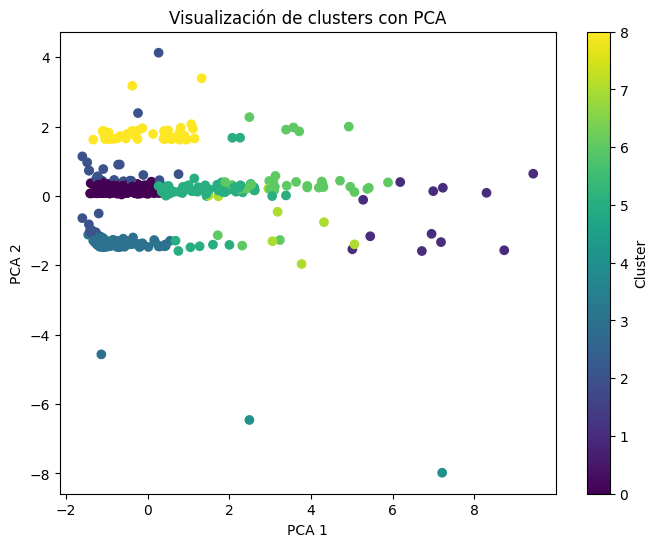

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(model_df[features])

plt.figure(figsize=(8,6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualización de clusters con PCA')
plt.colorbar(label='Cluster')
plt.show()


/home/manolo/2024-II/REDES/entregable/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


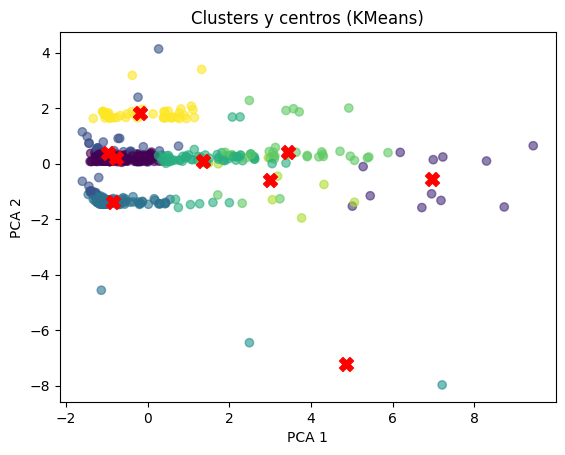

In [26]:
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=100, marker='X')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters y centros (KMeans)')
plt.show()


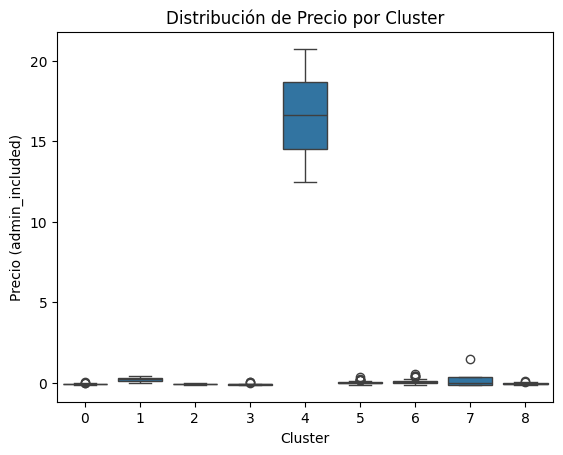

In [27]:
import seaborn as sns

model_df['Cluster'] = clusters
sns.boxplot(x='Cluster', y='Precio (admin_included)', data=model_df)
plt.title('Distribución de Precio por Cluster')
plt.show()


In [28]:
corr_matrix = model_df.corr()
print("Correlación de las variables con el Precio:")
print(corr_matrix['Precio (admin_included)'].sort_values(ascending=False))

Correlación de las variables con el Precio:
Precio (admin_included)      1.000000
Baños                        0.162788
Precio_por_m2                0.154236
Area Privada                 0.150954
Area                         0.145256
Habitaciones                 0.135333
Tipo de inmueble_Casa        0.134625
Parqueaderos                 0.132018
Size_Category_Large          0.100710
Cluster                      0.067231
Antiguedad_más de 30 años    0.061318
Size_Category_Huge           0.039059
Antiguedad_9 a 15 años       0.032484
Size_Category_Medium         0.028027
Bedroom_Bath_Ratio           0.017675
Estrato                     -0.015514
Piso                        -0.017593
Antiguedad_menor a 1 año    -0.029270
Antiguedad_16 a 30 años     -0.029851
Size_Category_Small         -0.051850
Name: Precio (admin_included), dtype: float64


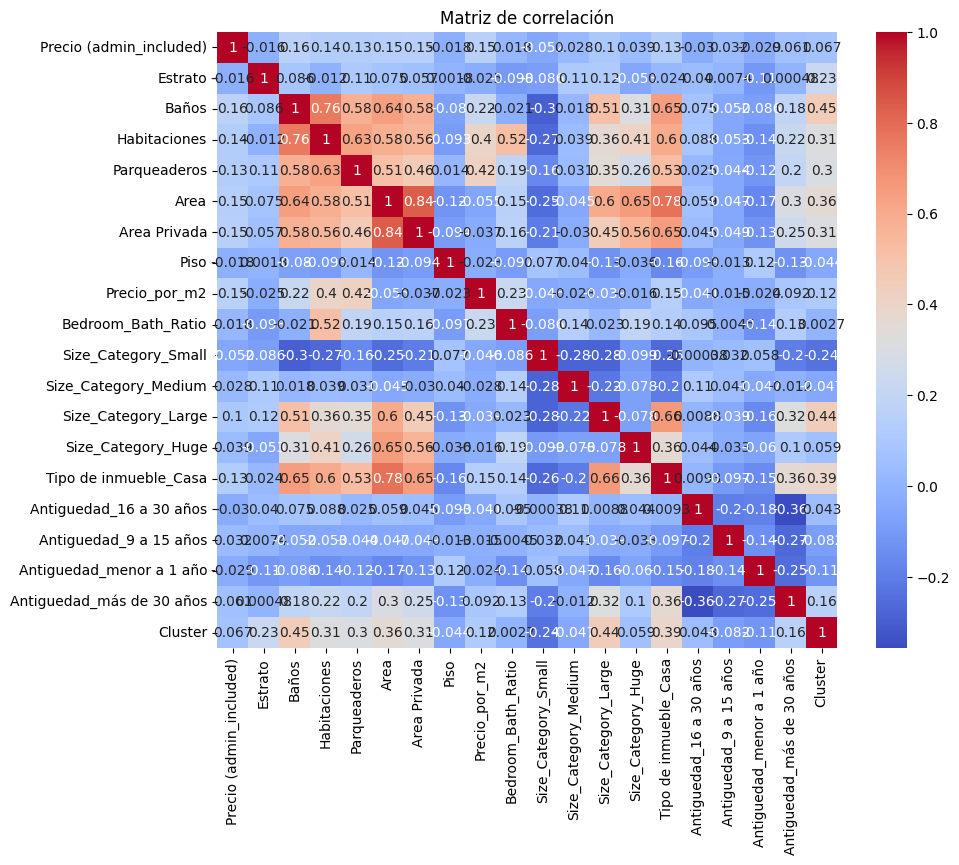

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()